In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
wine_df = pd.read_csv("wine.csv")


In [3]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
print("Shape:", wine_df.shape)
print("\nInfo:")
print(wine_df.info())

Shape: (178, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


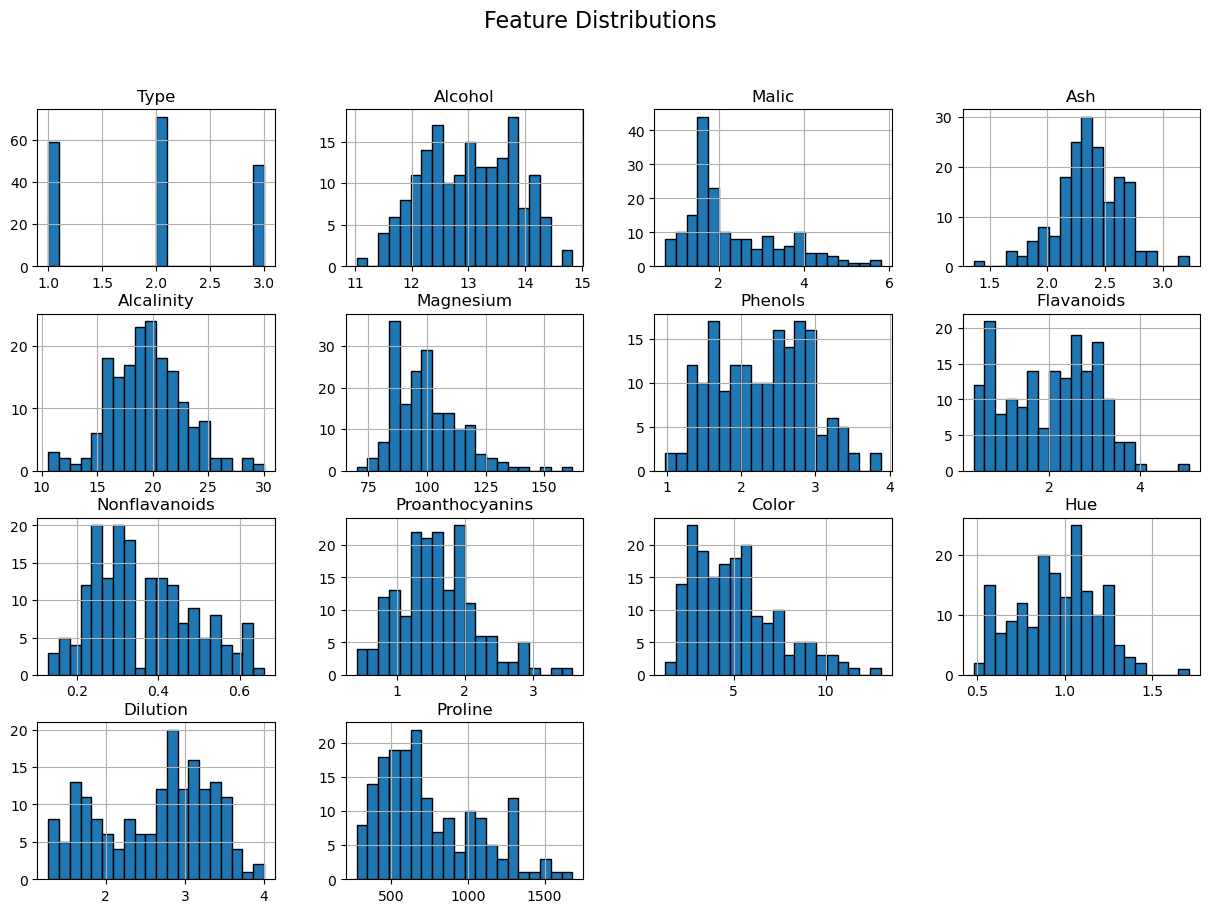

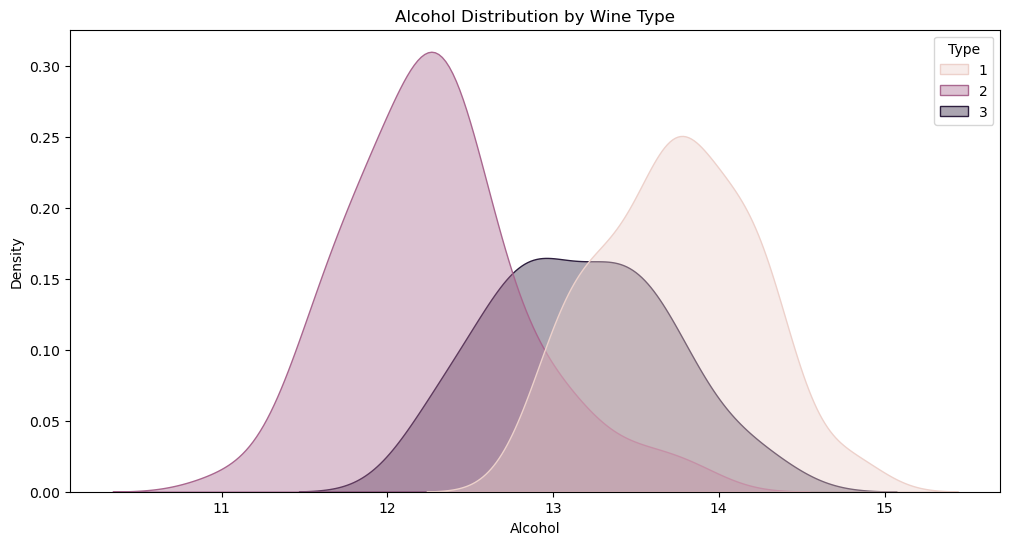

In [5]:
wine_df.hist(bins=20, figsize=(15,10), edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


plt.figure(figsize=(12,6))
sns.kdeplot(data=wine_df, x="Alcohol", hue="Type", fill=True, alpha=0.4)
plt.title("Alcohol Distribution by Wine Type")
plt.show()

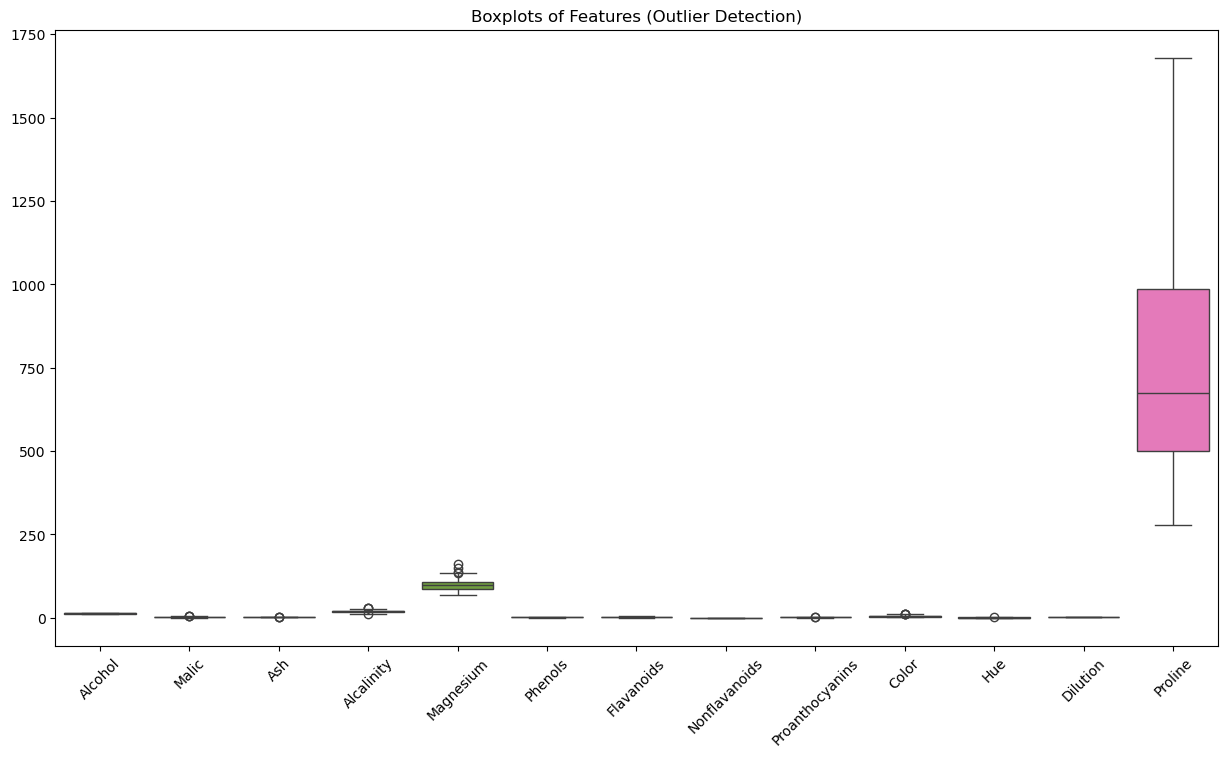

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(data=wine_df.drop("Type", axis=1))
plt.xticks(rotation=45)
plt.title("Boxplots of Features (Outlier Detection)")
plt.show()

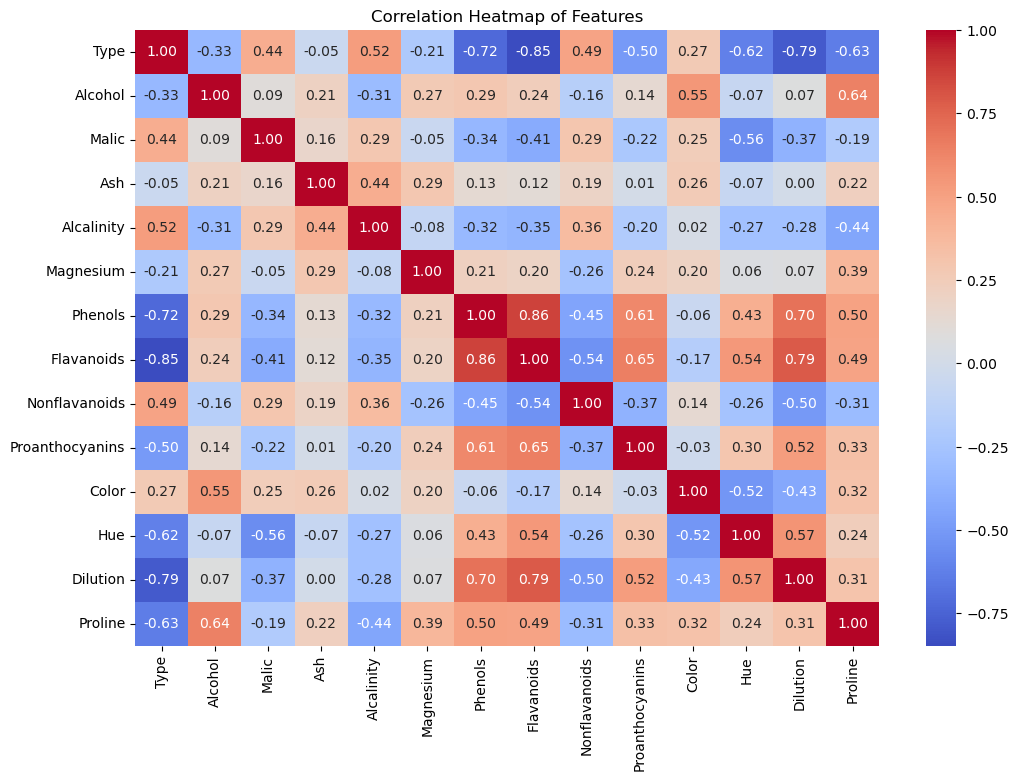

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler


X = wine_df.drop("Type", axis=1)
y = wine_df["Type"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean of scaled features (approx):", X_scaled.mean(axis=0)[:5])
print("Std of scaled features (approx):", X_scaled.std(axis=0)[:5])


Mean of scaled features (approx): [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17]
Std of scaled features (approx): [1. 1. 1. 1. 1.]


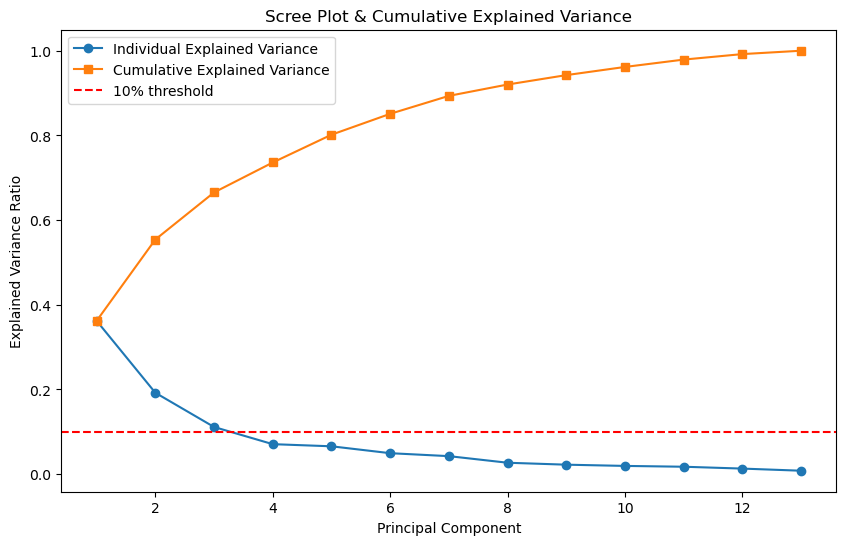

In [9]:
from sklearn.decomposition import PCA


# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o", label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="s", label="Cumulative Explained Variance")
plt.axhline(y=0.1, color='r', linestyle='--', label="10% threshold")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot & Cumulative Explained Variance")
plt.legend()
plt.show()


In [10]:

optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components (95% variance):", optimal_components)


Optimal number of components (95% variance): 10


In [11]:
# Apply PCA with optimal components
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Transformed shape:", X_pca_final.shape)

# Create DataFrame with PCs
pca_df = pd.DataFrame(X_pca_final, columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["Type"] = y.values
pca_df.head()


Original shape: (178, 13)
Transformed shape: (178, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,1
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,1
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,1
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,1
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,1


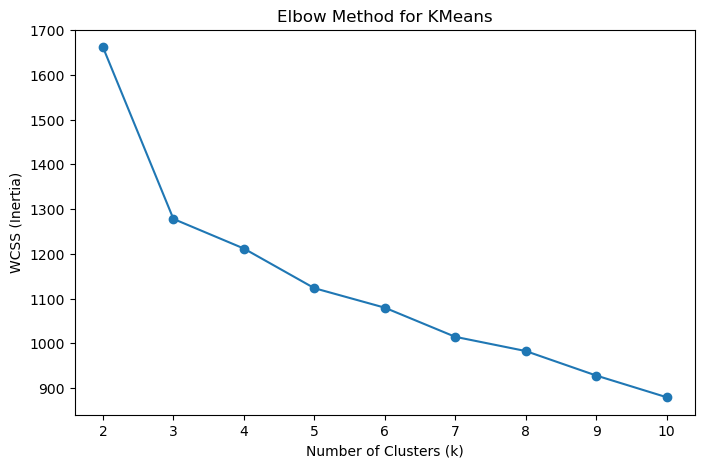

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

X_for_clustering = X_scaled


wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_for_clustering)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for KMeans")
plt.show()


In [15]:
# Fit final KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_for_clustering)

# Add cluster labels to dataframe
wine_df["Cluster_KMeans"] = clusters

# Evaluate clustering
sil_score = silhouette_score(X_for_clustering, clusters)
db_index = davies_bouldin_score(X_for_clustering, clusters)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.389187977718165


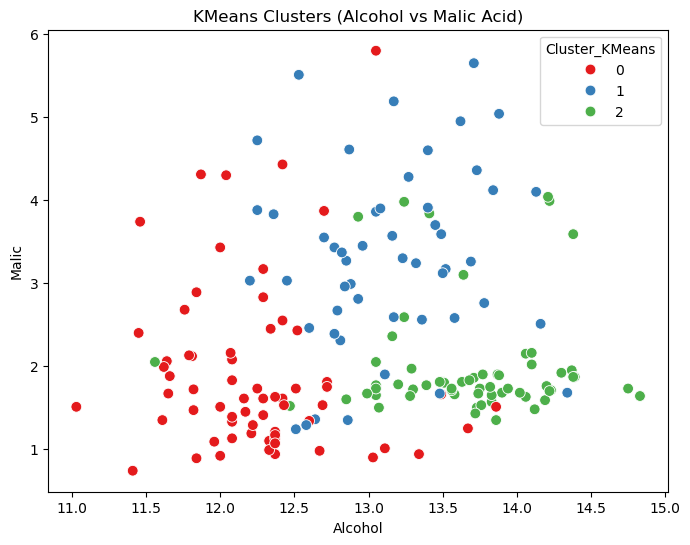

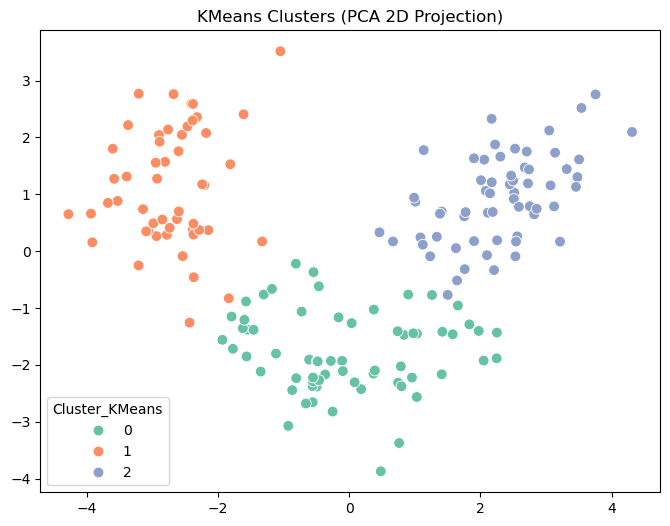

In [16]:
# Scatter plot using two original features
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=wine_df["Alcohol"], y=wine_df["Malic"],
    hue=wine_df["Cluster_KMeans"], palette="Set1", s=60
)
plt.title("KMeans Clusters (Alcohol vs Malic Acid)")
plt.show()

# PCA projection for visualization
from sklearn.decomposition import PCA
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_for_clustering)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_vis[:,0], y=X_vis[:,1],
    hue=wine_df["Cluster_KMeans"], palette="Set2", s=60
)
plt.title("KMeans Clusters (PCA 2D Projection)")
plt.show()


In [17]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_final)


pca_df["Cluster_KMeans_PCA"] = clusters_pca

# Evaluate clustering
sil_score_pca = silhouette_score(X_pca_final, clusters_pca)
db_index_pca = davies_bouldin_score(X_pca_final, clusters_pca)

print("Silhouette Score (PCA Data):", sil_score_pca)
print("Davies-Bouldin Index (PCA Data):", db_index_pca)


Silhouette Score (PCA Data): 0.2986748294369289
Davies-Bouldin Index (PCA Data): 1.3363263335155768


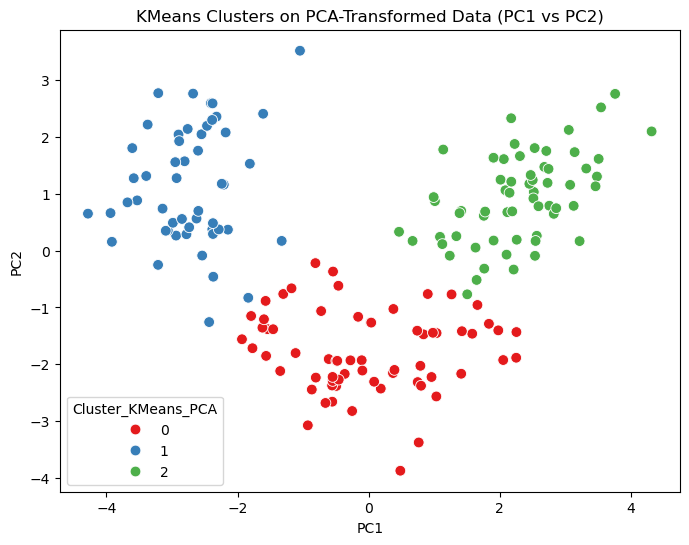

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_df["PC1"], y=pca_df["PC2"],
    hue=pca_df["Cluster_KMeans_PCA"], palette="Set1", s=60
)
plt.title("KMeans Clusters on PCA-Transformed Data (PC1 vs PC2)")
plt.show()


In [19]:
comparison_df = pd.DataFrame({
    "Dataset": ["Original Data", "PCA Data"],
    "Silhouette Score": [sil_score, sil_score_pca],
    "Davies-Bouldin Index": [db_index, db_index_pca]
})
comparison_df


,Dataset,Silhouette Score,Davies-Bouldin Index
0,Original Data,0.284859,1.389188
1,PCA Data,0.298675,1.336326


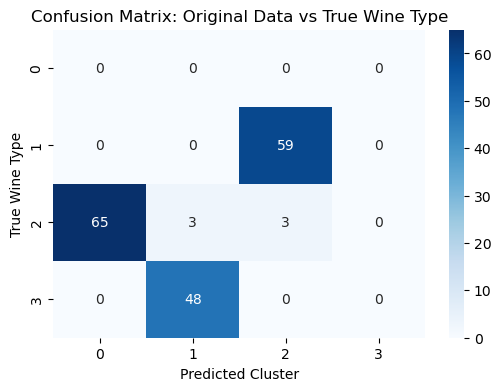

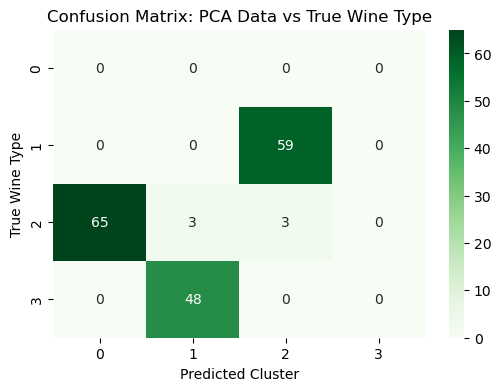

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_original = confusion_matrix(y, wine_df["Cluster_KMeans"])

plt.figure(figsize=(6,4))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Original Data vs True Wine Type")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Wine Type")
plt.show()

cm_pca = confusion_matrix(y, pca_df["Cluster_KMeans_PCA"])

plt.figure(figsize=(6,4))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: PCA Data vs True Wine Type")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Wine Type")
plt.show()


In [21]:

print("Clustering Evaluation Metrics")
print("-"*40)
print("Original Data -> Silhouette:", round(sil_score, 3), " | DBI:", round(db_index, 3))
print("PCA Data      -> Silhouette:", round(sil_score_pca, 3), " | DBI:", round(db_index_pca, 3))


Clustering Evaluation Metrics
----------------------------------------
Original Data -> Silhouette: 0.285  | DBI: 1.389
PCA Data      -> Silhouette: 0.299  | DBI: 1.336


In [22]:


print("========== EXECUTIVE SUMMARY ==========")
print("1. Dataset:")
print("   - Wine dataset with", X.shape[1], "features and", X.shape[0], "samples.")
print()

print("2. PCA Findings:")
print("   - Optimal components for 95% variance:", optimal_components)
print("   - PCA reduced dataset from", X.shape[1], "to", optimal_components, "features.")
print()

print("3. Clustering Results:")
print("   - KMeans on Original Data -> Silhouette:", round(sil_score, 3), " | DBI:", round(db_index, 3))
print("   - KMeans on PCA Data      -> Silhouette:", round(sil_score_pca, 3), " | DBI:", round(db_index_pca, 3))
print()

print("4. Insights:")
print("   - Both Original and PCA-based clustering identified ~3 clusters, matching wine types.")
print("   - PCA improved efficiency and slightly improved cluster separation.")
print("   - Trade-off: Original = interpretability, PCA = simplicity & noise reduction.")
print("========================================")


========== EXECUTIVE SUMMARY ==========
1. Dataset:
   - Wine dataset with 13 features and 178 samples.

2. PCA Findings:
   - Optimal components for 95% variance: 10
   - PCA reduced dataset from 13 to 10 features.

3. Clustering Results:
   - KMeans on Original Data -> Silhouette: 0.285  | DBI: 1.389
   - KMeans on PCA Data      -> Silhouette: 0.299  | DBI: 1.336

4. Insights:
   - Both Original and PCA-based clustering identified ~3 clusters, matching wine types.
   - PCA improved efficiency and slightly improved cluster separation.
   - Trade-off: Original = interpretability, PCA = simplicity & noise reduction.
